In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('/train.csv')
display(data.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [14]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 9 9 1] [3 3 9 ... 2 9 6]
0.09112195121951219
Iteration:  10
[7 0 2 ... 6 9 2] [3 3 9 ... 2 9 6]
0.17221951219512194
Iteration:  20
[2 0 2 ... 1 9 2] [3 3 9 ... 2 9 6]
0.27875609756097564
Iteration:  30
[2 0 4 ... 1 9 2] [3 3 9 ... 2 9 6]
0.36346341463414633
Iteration:  40
[3 0 4 ... 1 9 2] [3 3 9 ... 2 9 6]
0.4254390243902439
Iteration:  50
[3 0 4 ... 1 9 2] [3 3 9 ... 2 9 6]
0.48104878048780486
Iteration:  60
[3 0 9 ... 1 9 2] [3 3 9 ... 2 9 6]
0.5297560975609756
Iteration:  70
[3 0 9 ... 1 9 2] [3 3 9 ... 2 9 6]
0.5704390243902439
Iteration:  80
[3 0 9 ... 1 9 2] [3 3 9 ... 2 9 6]
0.6020243902439024
Iteration:  90
[3 0 9 ... 2 9 2] [3 3 9 ... 2 9 6]
0.6301463414634146
Iteration:  100
[3 0 9 ... 2 9 2] [3 3 9 ... 2 9 6]
0.6530975609756098
Iteration:  110
[3 8 9 ... 2 9 2] [3 3 9 ... 2 9 6]
0.6738536585365854
Iteration:  120
[3 8 9 ... 2 9 6] [3 3 9 ... 2 9 6]
0.6905121951219512
Iteration:  130
[3 8 9 ... 2 9 6] [3 3 9 ... 2 9 6]
0.7040243902439024
Iteration:  

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [5]
Label:  3


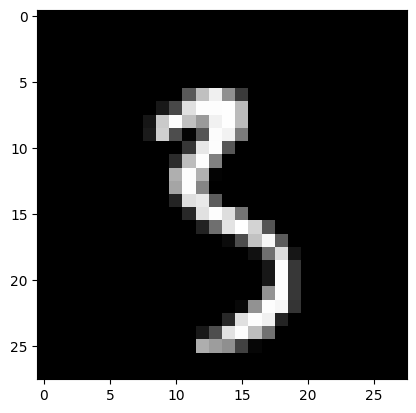

Prediction:  [9]
Label:  9


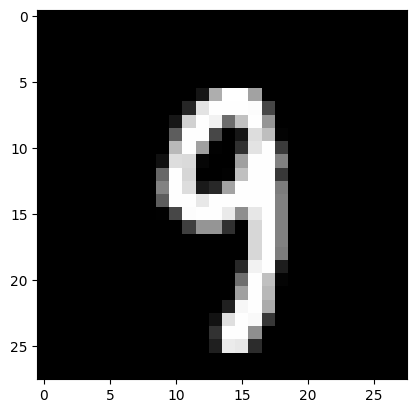

Prediction:  [4]
Label:  4


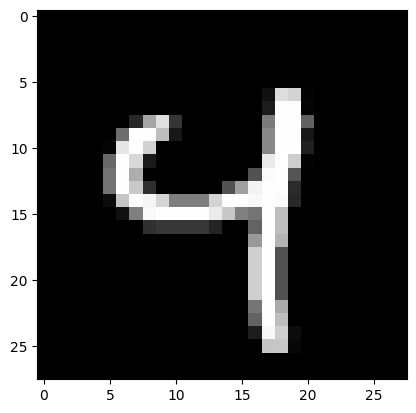

Prediction:  [8]
Label:  8


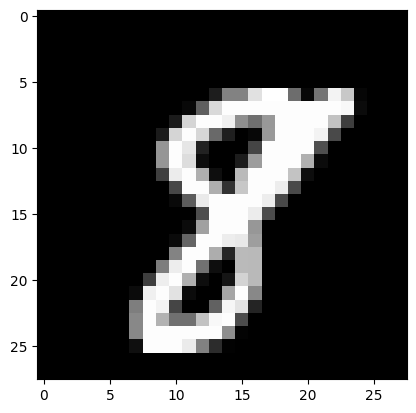

In [33]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)


## Training on Tensorflow and Keras

Load the MNIST dataset (or the same dataset if it's in a different format) using TensorFlow or Keras built-in functions. Preprocess the data by normalizing pixel values and reshaping the images.


In [27]:
import tensorflow as tf
from tensorflow import keras

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to include channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


## Build the model

Define a sequential model using Keras layers, including dense layers and appropriate activation functions.


In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compile the Keras sequential model with the specified optimizer, loss function, and metrics.



In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Train the model using the preprocessed training data.


In [30]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8665 - loss: 0.4532 - val_accuracy: 0.9647 - val_loss: 0.1129
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1241 - val_accuracy: 0.9730 - val_loss: 0.0956
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0778 - val_accuracy: 0.9798 - val_loss: 0.0726
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9822 - loss: 0.0576 - val_accuracy: 0.9758 - val_loss: 0.0844
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0462 - val_accuracy: 0.9758 - val_loss: 0.0873
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9881 - loss: 0.0351 - val_accuracy: 0.9715 - val_loss: 0.1033
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9793 - val_loss: 0.0818
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0236 -

## Evaluate the model

Evaluate the trained model's performance on the test data.


In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.9748 - loss: 0.1036

Test accuracy: 0.9747999906539917


## Make predictions and visualize

Use the trained model to make predictions on new images and visualize the results.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


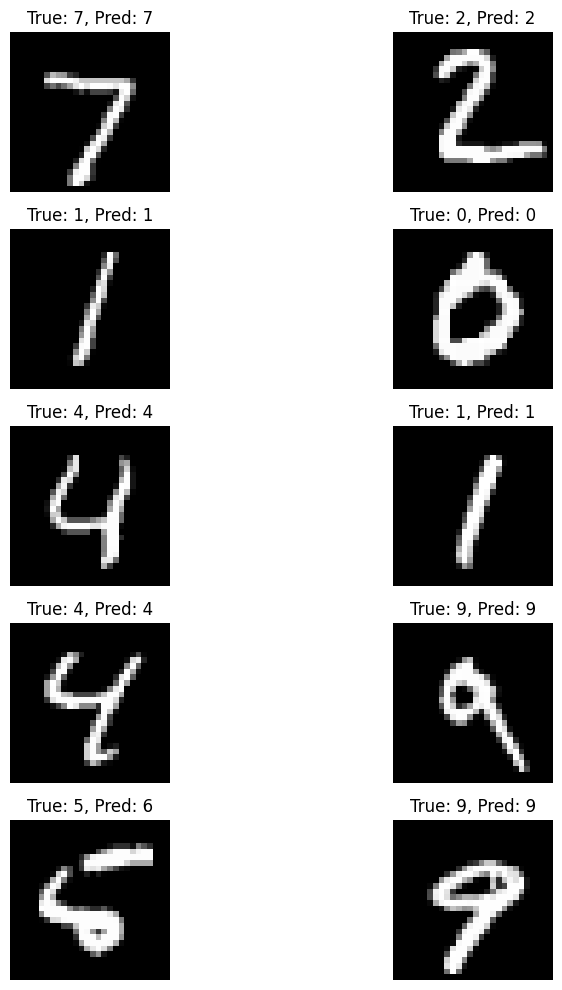

In [32]:
# Select a few images from the test dataset
num_images_to_test = 10
test_images = x_test[:num_images_to_test]
test_labels = y_test[:num_images_to_test]

# Make predictions
predictions = model.predict(test_images)

# Get predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels back from one-hot encoding
true_labels = np.argmax(test_labels, axis=1)

# Visualize the results
plt.figure(figsize=(10, 10))
for i in range(num_images_to_test):
    plt.subplot(5, 2, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The MNIST dataset was successfully loaded, preprocessed by normalizing pixel values to the range [0, 1], and reshaped to include a channel dimension, resulting in training data with a shape of (60000, 28, 28, 1) and test data with a shape of (10000, 28, 28, 1).
*   The labels were converted to one-hot encoded vectors, with training labels having a shape of (60000, 10) and test labels having a shape of (10000, 10).
*   A sequential Keras model was built with a Flatten layer, two Dense layers with ReLU activation (128 and 64 units), and an output Dense layer with 10 units and softmax activation.
*   The model was compiled using the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.
*   The model was trained for 10 epochs with a 10% validation split, showing improvement in both training and validation accuracy over the epochs.
*   The trained model achieved a test accuracy of approximately 0.9748 (97.48%) on the test dataset.
*   Predictions made on a sample of test images show the model correctly identifying the digits in most cases.

### Insights or Next Steps
*   The developed model demonstrates strong performance on the MNIST digit recognition task, achieving over 97% accuracy on the test set.
*   Further improvements could be explored by using a Convolutional Neural Network (CNN) architecture, which is typically more effective for image recognition tasks.
